# Car Price Prediction

# Import Required Libraries:

In [19]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Machine learning models
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor

# Model evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

# Load and Explore dataset

In [21]:
# Load the dataset
df = pd.read_csv('car data.csv')

# Display first few rows
print("First 5 rows of the dataset:")
print(df.head())

# Dataset shape
print(f"\nDataset Shape: {df.shape}")
print(f"Number of records: {df.shape[0]}")
print(f"Number of features: {df.shape[1]}")

# Dataset information
print("\nDataset Information:")
print(df.info())

# Statistical summary
print("\nStatistical Summary:")
print(df.describe())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

First 5 rows of the dataset:
  Car_Name  Year  Selling_Price  Present_Price  Driven_kms Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Selling_type Transmission  Owner  
0       Dealer       Manual      0  
1       Dealer       Manual      0  
2       Dealer       Manual      0  
3       Dealer       Manual      0  
4       Dealer       Manual      0  

Dataset Shape: (301, 9)
Number of records: 301
Number of features: 9

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null

# Data Cleaning and Preprocessing

In [22]:
# Check for duplicate rows
print(f"Duplicate rows: {df.duplicated().sum()}")
df = df.drop_duplicates()

# Calculate car age from year
current_year = 2024
df['Car_Age'] = current_year - df['Year']

# Check unique values in categorical columns
print("\nUnique values in categorical columns:")
print(f"Fuel_Type: {df['Fuel_Type'].unique()}")
print(f"Selling_type: {df['Selling_type'].unique()}")
print(f"Transmission: {df['Transmission'].unique()}")
print(f"Owner: {df['Owner'].unique()}")

# Check for outliers in numeric columns
numeric_cols = ['Selling_Price', 'Present_Price', 'Driven_kms', 'Car_Age']
print("\nOutlier Detection:")
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"{col}: {len(outliers)} outliers")

Duplicate rows: 2

Unique values in categorical columns:
Fuel_Type: ['Petrol' 'Diesel' 'CNG']
Selling_type: ['Dealer' 'Individual']
Transmission: ['Manual' 'Automatic']
Owner: [0 1 3]

Outlier Detection:
Selling_Price: 16 outliers
Present_Price: 14 outliers
Driven_kms: 8 outliers
Car_Age: 7 outliers


# Exploratory Data Analysis (EDA)

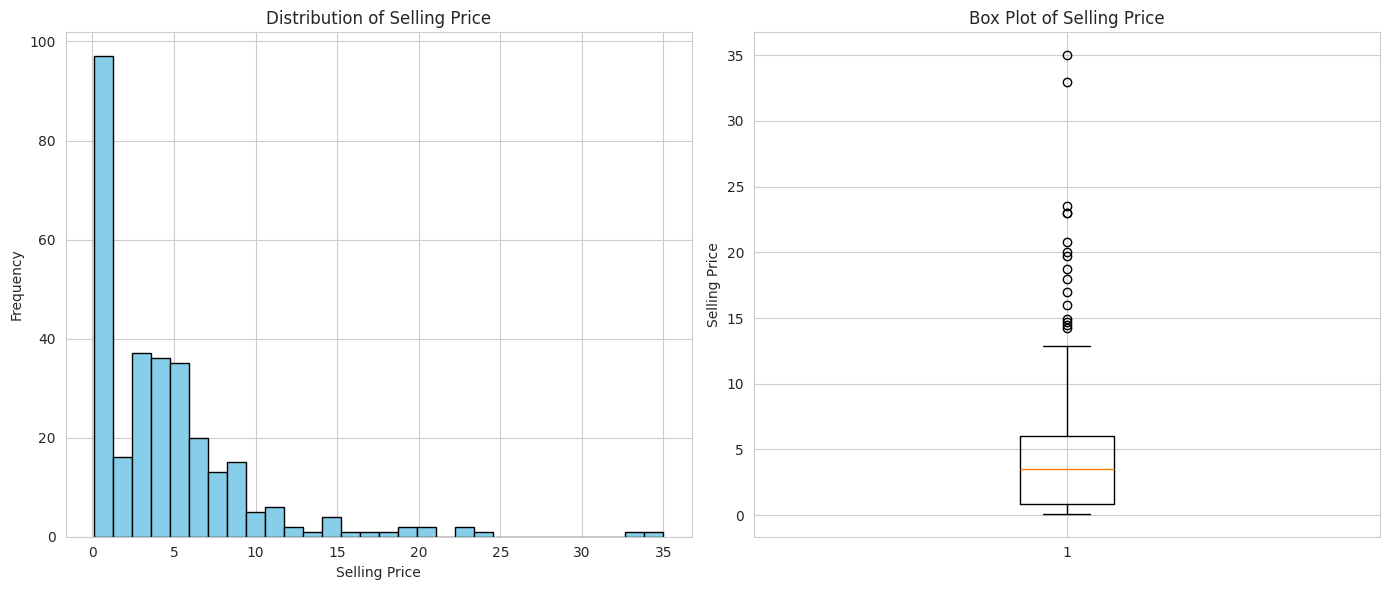

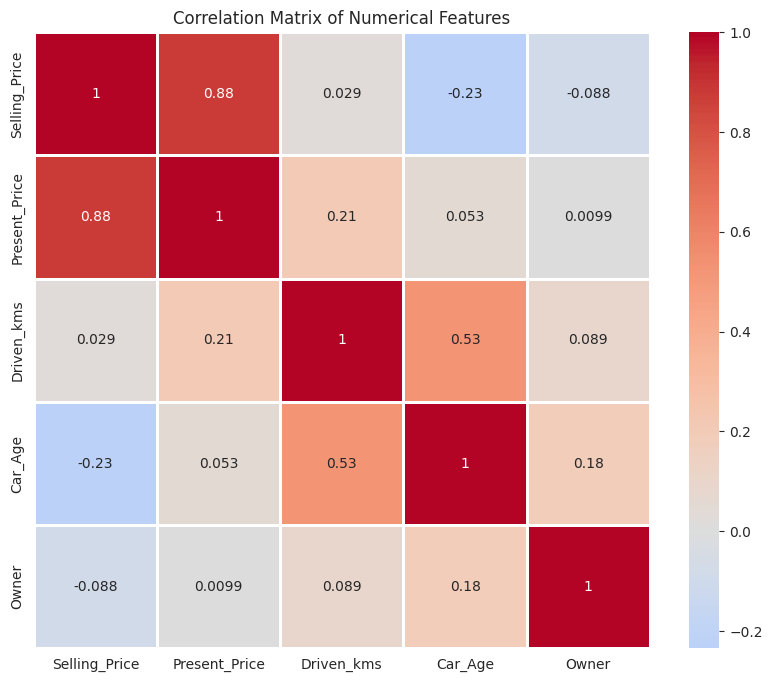

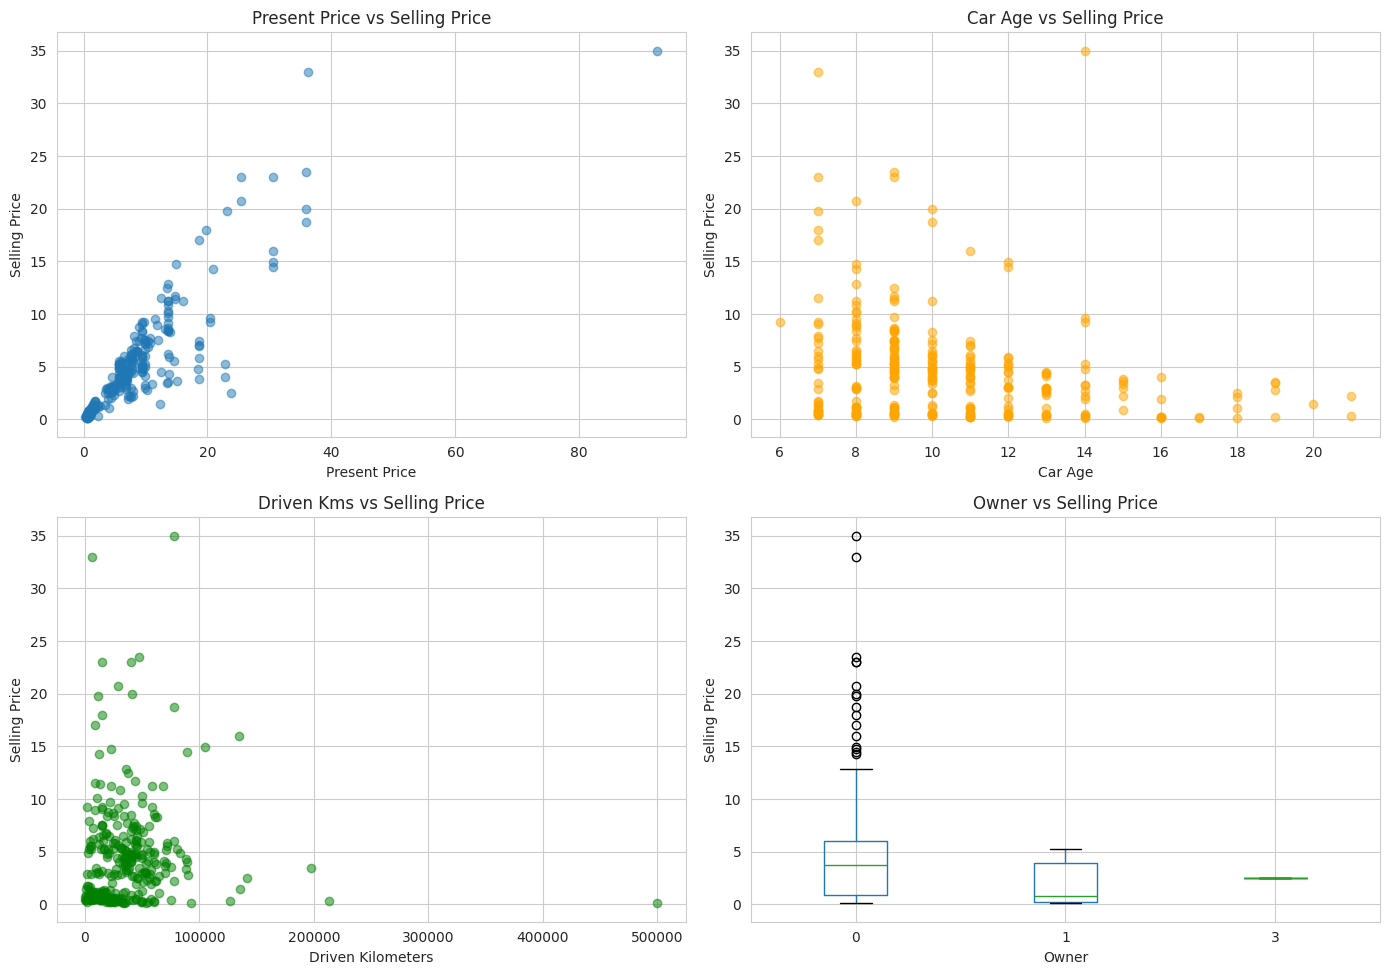

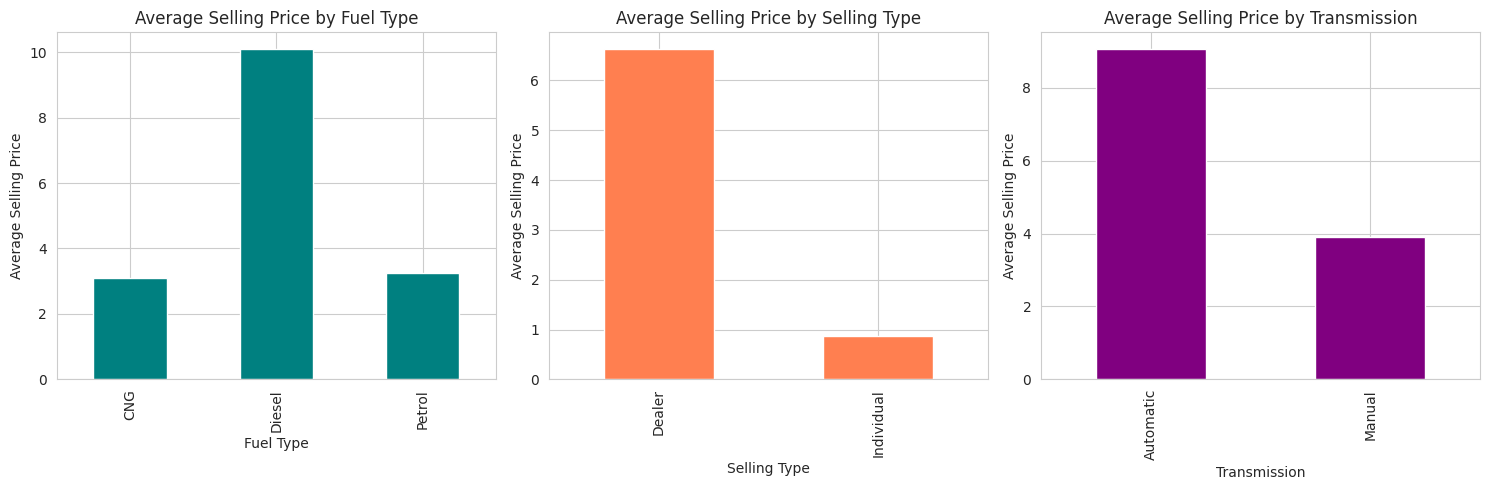

In [23]:
# Distribution of target variable (Selling_Price)
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.hist(df['Selling_Price'], bins=30, edgecolor='black', color='skyblue')
plt.xlabel('Selling Price')
plt.ylabel('Frequency')
plt.title('Distribution of Selling Price')

plt.subplot(1, 2, 2)
plt.boxplot(df['Selling_Price'])
plt.ylabel('Selling Price')
plt.title('Box Plot of Selling Price')

plt.tight_layout()
plt.show()

# Correlation analysis
plt.figure(figsize=(10, 8))
correlation_matrix = df[['Selling_Price', 'Present_Price', 'Driven_kms',
                          'Car_Age', 'Owner']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=1)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# Relationship between features and target
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Present Price vs Selling Price
axes[0, 0].scatter(df['Present_Price'], df['Selling_Price'], alpha=0.5)
axes[0, 0].set_xlabel('Present Price')
axes[0, 0].set_ylabel('Selling Price')
axes[0, 0].set_title('Present Price vs Selling Price')

# Car Age vs Selling Price
axes[0, 1].scatter(df['Car_Age'], df['Selling_Price'], alpha=0.5, color='orange')
axes[0, 1].set_xlabel('Car Age')
axes[0, 1].set_ylabel('Selling Price')
axes[0, 1].set_title('Car Age vs Selling Price')

# Driven kms vs Selling Price
axes[1, 0].scatter(df['Driven_kms'], df['Selling_Price'], alpha=0.5, color='green')
axes[1, 0].set_xlabel('Driven Kilometers')
axes[1, 0].set_ylabel('Selling Price')
axes[1, 0].set_title('Driven Kms vs Selling Price')

# Owner vs Selling Price
df.boxplot(column='Selling_Price', by='Owner', ax=axes[1, 1])
axes[1, 1].set_xlabel('Owner')
axes[1, 1].set_ylabel('Selling Price')
axes[1, 1].set_title('Owner vs Selling Price')
plt.suptitle('')

plt.tight_layout()
plt.show()

# Categorical features analysis
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Fuel Type
df.groupby('Fuel_Type')['Selling_Price'].mean().plot(kind='bar', ax=axes[0], color='teal')
axes[0].set_title('Average Selling Price by Fuel Type')
axes[0].set_ylabel('Average Selling Price')
axes[0].set_xlabel('Fuel Type')

# Selling Type
df.groupby('Selling_type')['Selling_Price'].mean().plot(kind='bar', ax=axes[1], color='coral')
axes[1].set_title('Average Selling Price by Selling Type')
axes[1].set_ylabel('Average Selling Price')
axes[1].set_xlabel('Selling Type')

# Transmission
df.groupby('Transmission')['Selling_Price'].mean().plot(kind='bar', ax=axes[2], color='purple')
axes[2].set_title('Average Selling Price by Transmission')
axes[2].set_ylabel('Average Selling Price')
axes[2].set_xlabel('Transmission')

plt.tight_layout()
plt.show()

# Feature Engineering

In [24]:
# Create a copy for feature engineering
df_processed = df.copy()

# Extract brand from Car_Name (first word is usually the brand)
df_processed['Brand'] = df_processed['Car_Name'].str.split().str[0]

# Encode categorical variables
label_encoders = {}
categorical_cols = ['Fuel_Type', 'Selling_type', 'Transmission', 'Brand']

for col in categorical_cols:
    le = LabelEncoder()
    df_processed[col + '_Encoded'] = le.fit_transform(df_processed[col])
    label_encoders[col] = le

# Create interaction features
df_processed['Price_per_km'] = df_processed['Present_Price'] / (df_processed['Driven_kms'] + 1)
df_processed['Age_km_interaction'] = df_processed['Car_Age'] * df_processed['Driven_kms']

# Create polynomial features
df_processed['Present_Price_Squared'] = df_processed['Present_Price'] ** 2
df_processed['Car_Age_Squared'] = df_processed['Car_Age'] ** 2

# Display processed features
print("Processed Dataset Columns:")
print(df_processed.columns.tolist())
print(f"\nProcessed Dataset Shape: {df_processed.shape}")

Processed Dataset Columns:
['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms', 'Fuel_Type', 'Selling_type', 'Transmission', 'Owner', 'Car_Age', 'Brand', 'Fuel_Type_Encoded', 'Selling_type_Encoded', 'Transmission_Encoded', 'Brand_Encoded', 'Price_per_km', 'Age_km_interaction', 'Present_Price_Squared', 'Car_Age_Squared']

Processed Dataset Shape: (299, 19)


# Prepare Data for Modeling

In [25]:
# Select features for modeling
feature_columns = [
    'Present_Price', 'Driven_kms', 'Car_Age', 'Owner',
    'Fuel_Type_Encoded', 'Selling_type_Encoded', 'Transmission_Encoded',
    'Brand_Encoded', 'Price_per_km', 'Age_km_interaction',
    'Present_Price_Squared', 'Car_Age_Squared'
]

X = df_processed[feature_columns]
y = df_processed['Selling_Price']

# Split data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Training set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\nFeature scaling completed!")

Training set size: 239
Testing set size: 60

Feature scaling completed!


# Train Multiple Models

In [26]:
# Dictionary to store models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=0.1),
    'Decision Tree': DecisionTreeRegressor(random_state=42, max_depth=10),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42, max_depth=15),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42, max_depth=5)
}

# Train and evaluate each model
results = {}

for name, model in models.items():
    print(f"\nTraining {name}...")

    # Train the model
    model.fit(X_train_scaled, y_train)

    # Make predictions
    y_train_pred = model.predict(X_train_scaled)
    y_test_pred = model.predict(X_test_scaled)

    # Evaluate the model
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    train_mae = mean_absolute_error(y_train, y_train_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

    # Store results
    results[name] = {
        'Model': model,
        'Train R2': train_r2,
        'Test R2': test_r2,
        'Train MAE': train_mae,
        'Test MAE': test_mae,
        'Train RMSE': train_rmse,
        'Test RMSE': test_rmse
    }

    print(f"{name} Results:")
    print(f"  Train R² Score: {train_r2:.4f}")
    print(f"  Test R² Score: {test_r2:.4f}")
    print(f"  Test MAE: {test_mae:.4f}")
    print(f"  Test RMSE: {test_rmse:.4f}")


Training Linear Regression...
Linear Regression Results:
  Train R² Score: 0.9330
  Test R² Score: 0.7581
  Test MAE: 1.5445
  Test RMSE: 2.4968

Training Ridge Regression...
Ridge Regression Results:
  Train R² Score: 0.9319
  Test R² Score: 0.7768
  Test MAE: 1.4948
  Test RMSE: 2.3984

Training Lasso Regression...
Lasso Regression Results:
  Train R² Score: 0.9212
  Test R² Score: 0.8144
  Test MAE: 1.3406
  Test RMSE: 2.1874

Training Decision Tree...
Decision Tree Results:
  Train R² Score: 0.9997
  Test R² Score: 0.7586
  Test MAE: 1.2061
  Test RMSE: 2.4942

Training Random Forest...
Random Forest Results:
  Train R² Score: 0.9851
  Test R² Score: 0.5418
  Test MAE: 1.3718
  Test RMSE: 3.4364

Training Gradient Boosting...
Gradient Boosting Results:
  Train R² Score: 0.9999
  Test R² Score: 0.8136
  Test MAE: 0.9915
  Test RMSE: 2.1916


# Model Evaluation and Comparison


Model Comparison:
            Model  Train R²  Test R²  Test MAE  Test RMSE
Linear Regression  0.932991 0.758120  1.544477   2.496804
 Ridge Regression  0.931903 0.776803  1.494801   2.398442
 Lasso Regression  0.921159 0.814356  1.340611   2.187385
    Decision Tree  0.999662 0.758627  1.206125   2.494190
    Random Forest  0.985096 0.541816  1.371803   3.436407
Gradient Boosting  0.999891 0.813641  0.991517   2.191594


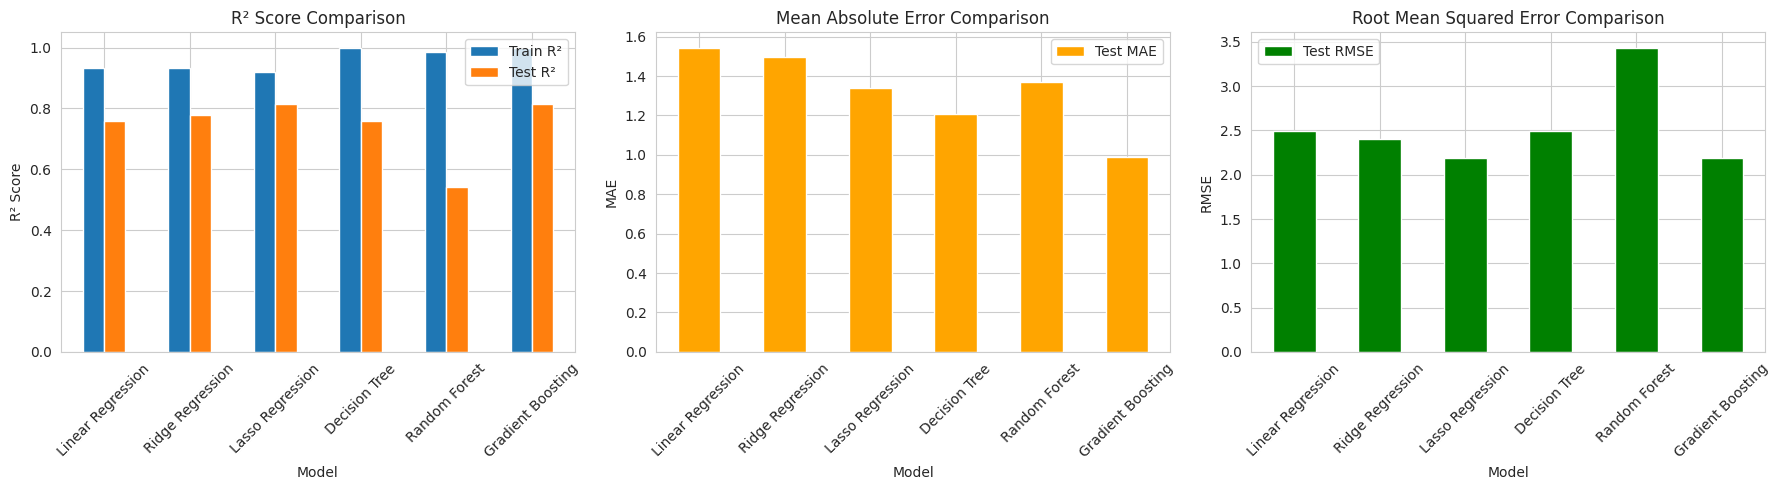


Best Model: Lasso Regression


In [27]:
# Create comparison dataframe
comparison_df = pd.DataFrame({
    'Model': list(results.keys()),
    'Train R²': [results[m]['Train R2'] for m in results.keys()],
    'Test R²': [results[m]['Test R2'] for m in results.keys()],
    'Test MAE': [results[m]['Test MAE'] for m in results.keys()],
    'Test RMSE': [results[m]['Test RMSE'] for m in results.keys()]
})

print("\nModel Comparison:")
print(comparison_df.to_string(index=False))

# Visualize model comparison
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# R² Score comparison
comparison_df.plot(x='Model', y=['Train R²', 'Test R²'], kind='bar', ax=axes[0])
axes[0].set_title('R² Score Comparison')
axes[0].set_ylabel('R² Score')
axes[0].set_xlabel('Model')
axes[0].legend(['Train R²', 'Test R²'])
axes[0].tick_params(axis='x', rotation=45)

# MAE comparison
comparison_df.plot(x='Model', y='Test MAE', kind='bar', ax=axes[1], color='orange')
axes[1].set_title('Mean Absolute Error Comparison')
axes[1].set_ylabel('MAE')
axes[1].set_xlabel('Model')
axes[1].tick_params(axis='x', rotation=45)

# RMSE comparison
comparison_df.plot(x='Model', y='Test RMSE', kind='bar', ax=axes[2], color='green')
axes[2].set_title('Root Mean Squared Error Comparison')
axes[2].set_ylabel('RMSE')
axes[2].set_xlabel('Model')
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Select best model based on Test R² score
best_model_name = comparison_df.loc[comparison_df['Test R²'].idxmax(), 'Model']
best_model = results[best_model_name]['Model']
print(f"\nBest Model: {best_model_name}")

# Feature Importance Analysis


Feature Importance for Lasso Regression:
                  Feature  Coefficient  Abs_Coefficient
0           Present_Price     4.174752         4.174752
2                 Car_Age    -0.798201         0.798201
8            Price_per_km     0.616832         0.616832
10  Present_Price_Squared    -0.527200         0.527200
4       Fuel_Type_Encoded    -0.428446         0.428446
6    Transmission_Encoded    -0.358701         0.358701
5    Selling_type_Encoded    -0.211193         0.211193
7           Brand_Encoded     0.055519         0.055519
3                   Owner     0.000000         0.000000
1              Driven_kms    -0.000000         0.000000
9      Age_km_interaction    -0.000000         0.000000
11        Car_Age_Squared    -0.000000         0.000000


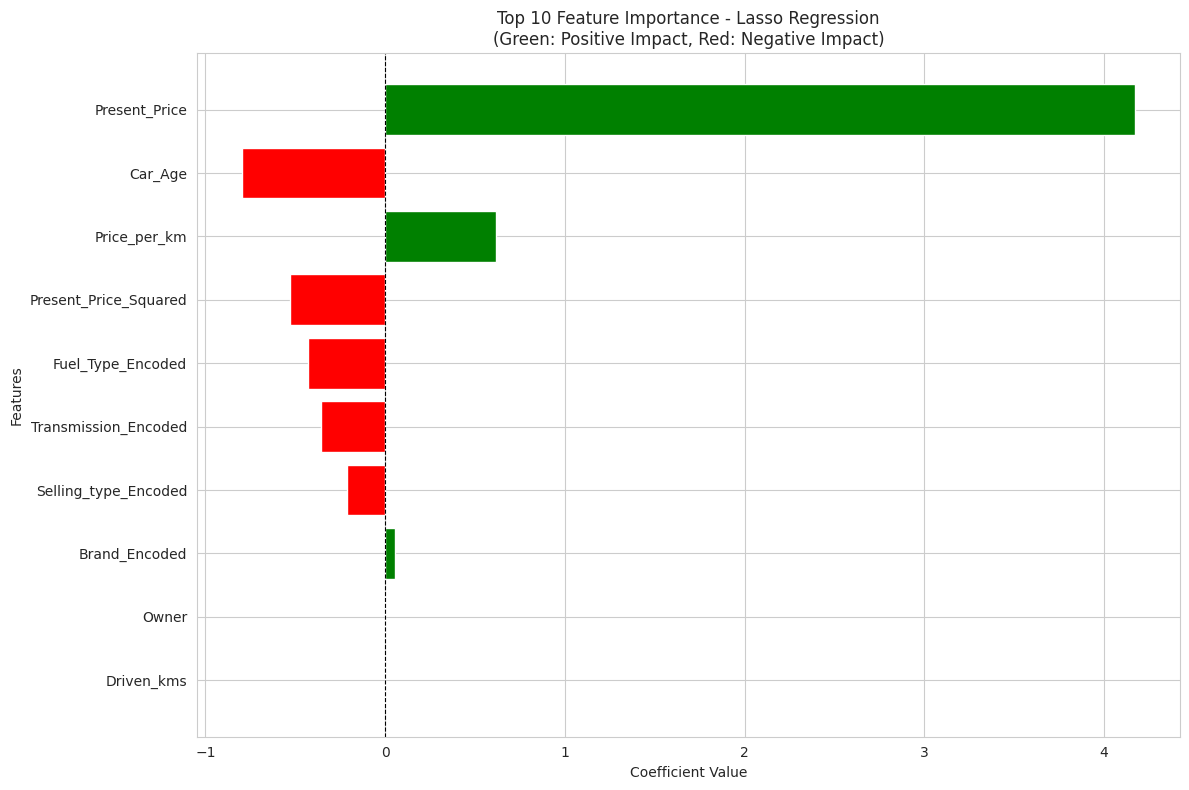

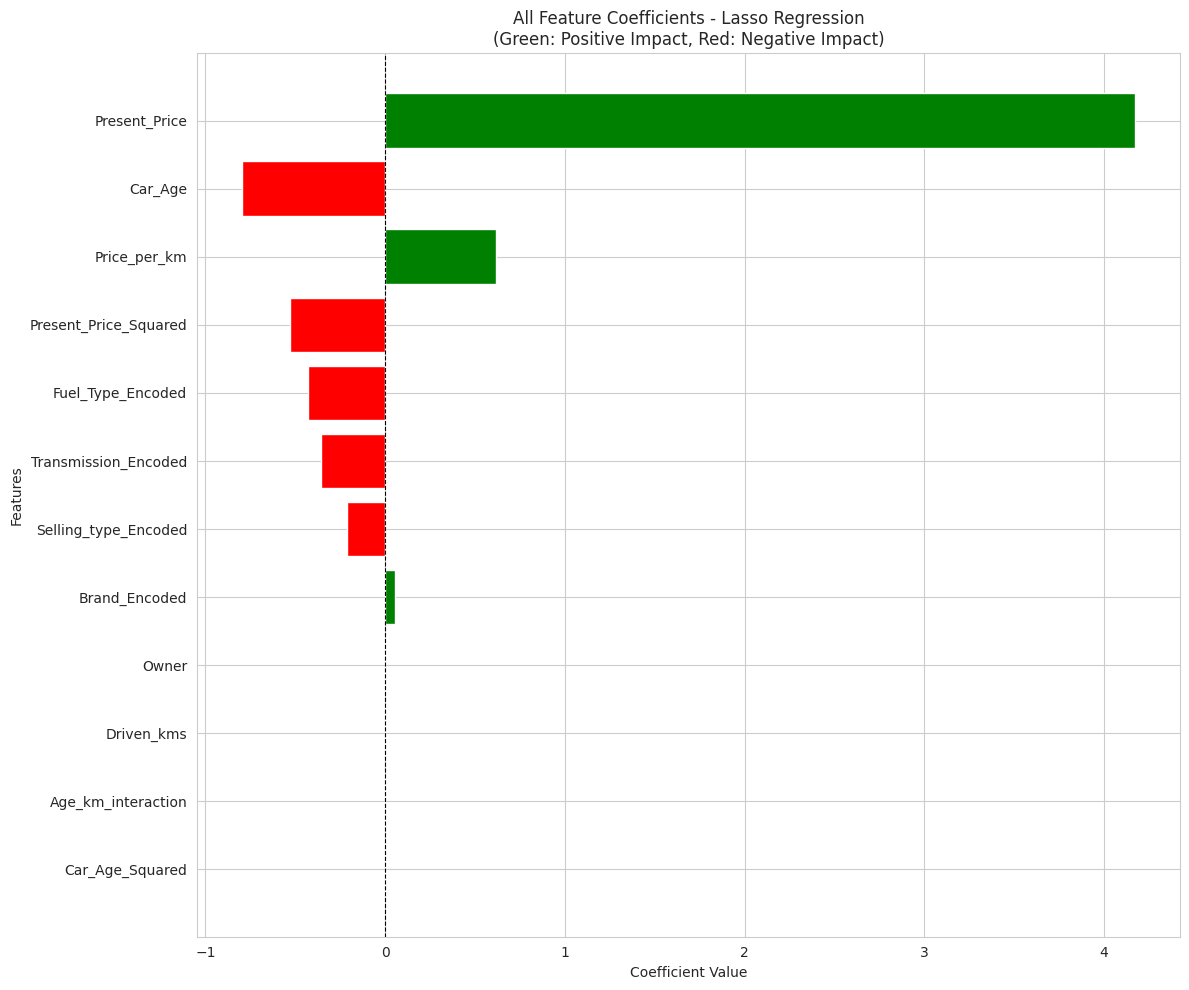


Lasso Regression eliminated 4 features:
['Owner', 'Driven_kms', 'Age_km_interaction', 'Car_Age_Squared']

Top 5 Most Important Features (by absolute coefficient):
                  Feature  Coefficient  Abs_Coefficient
0           Present_Price     4.174752         4.174752
2                 Car_Age    -0.798201         0.798201
8            Price_per_km     0.616832         0.616832
10  Present_Price_Squared    -0.527200         0.527200
4       Fuel_Type_Encoded    -0.428446         0.428446


In [31]:
# Feature importance for Lasso Regression (Linear Models)
if best_model_name in ['Linear Regression', 'Ridge Regression', 'Lasso Regression']:
    # Get coefficients
    coefficients = best_model.coef_

    # Create feature importance dataframe
    feature_importance = pd.DataFrame({
        'Feature': feature_columns,
        'Coefficient': coefficients,
        'Abs_Coefficient': np.abs(coefficients)
    }).sort_values('Abs_Coefficient', ascending=False)

    print(f"\nFeature Importance for {best_model_name}:")
    print(feature_importance)

    # Plot feature importance (using absolute coefficients)
    plt.figure(figsize=(12, 8))

    # Top 10 features by absolute coefficient value
    top_features = feature_importance.head(10)

    colors = ['green' if x > 0 else 'red' for x in top_features['Coefficient']]

    plt.barh(top_features['Feature'], top_features['Coefficient'], color=colors)
    plt.xlabel('Coefficient Value')
    plt.ylabel('Features')
    plt.title(f'Top 10 Feature Importance - {best_model_name}\n(Green: Positive Impact, Red: Negative Impact)')
    plt.axvline(x=0, color='black', linestyle='--', linewidth=0.8)
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()

    # Additional visualization: All features
    plt.figure(figsize=(12, 10))

    colors_all = ['green' if x > 0 else 'red' for x in feature_importance['Coefficient']]

    plt.barh(feature_importance['Feature'], feature_importance['Coefficient'], color=colors_all)
    plt.xlabel('Coefficient Value')
    plt.ylabel('Features')
    plt.title(f'All Feature Coefficients - {best_model_name}\n(Green: Positive Impact, Red: Negative Impact)')
    plt.axvline(x=0, color='black', linestyle='--', linewidth=0.8)
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()

    # Check which features were eliminated by Lasso (coefficient = 0)
    eliminated_features = feature_importance[feature_importance['Abs_Coefficient'] == 0]

    if len(eliminated_features) > 0:
        print(f"\n{best_model_name} eliminated {len(eliminated_features)} features:")
        print(eliminated_features['Feature'].tolist())
    else:
        print(f"\n{best_model_name} kept all features (none eliminated)")

    # Show the most important features
    print("\nTop 5 Most Important Features (by absolute coefficient):")
    print(feature_importance.head(5)[['Feature', 'Coefficient', 'Abs_Coefficient']])

# Prediction Visualization

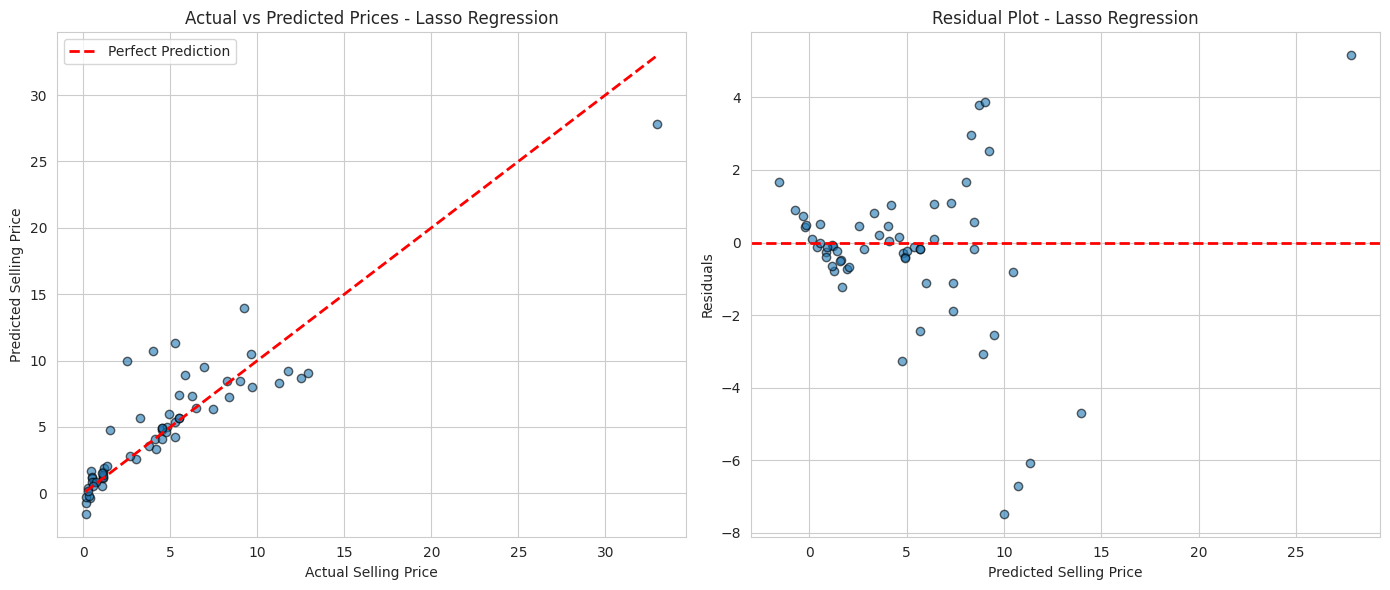

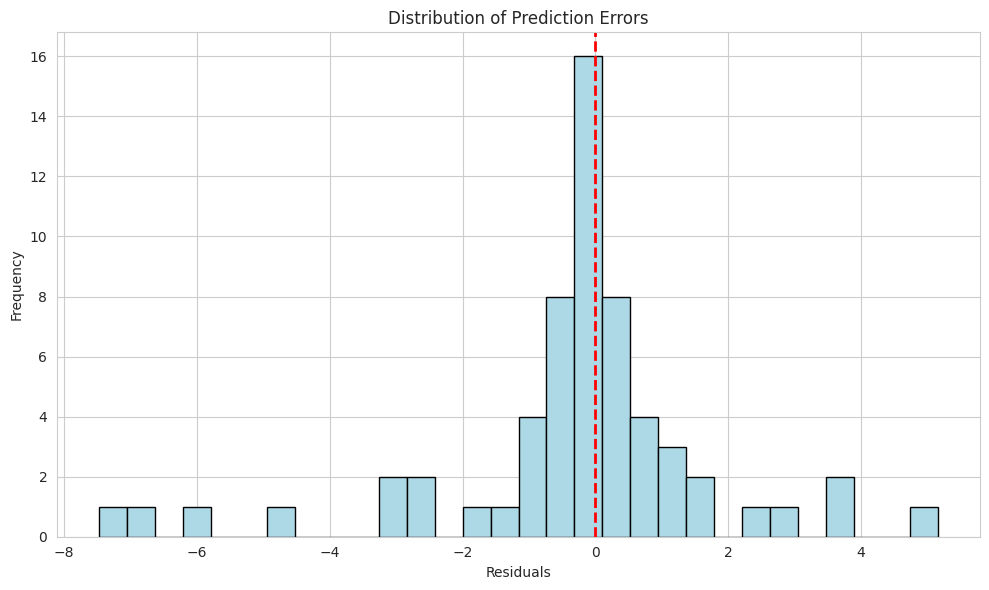

In [35]:
# Get predictions from the best model
y_pred = best_model.predict(X_test_scaled)

# Actual vs Predicted plot
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, alpha=0.6, edgecolors='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
         'r--', lw=2, label='Perfect Prediction')
plt.xlabel('Actual Selling Price')
plt.ylabel('Predicted Selling Price')
plt.title(f'Actual vs Predicted Prices - {best_model_name}')
plt.legend()

# Residual plot
plt.subplot(1, 2, 2)
residuals = y_test - y_pred
plt.scatter(y_pred, residuals, alpha=0.6, edgecolors='k')
plt.axhline(y=0, color='r', linestyle='--', lw=2)
plt.xlabel('Predicted Selling Price')
plt.ylabel('Residuals')
plt.title(f'Residual Plot - {best_model_name}')

plt.tight_layout()
plt.show()

# Error distribution
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=30, edgecolor='black', color='lightblue')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Prediction Errors')
plt.axvline(x=0, color='r', linestyle='--', lw=2)
plt.tight_layout()
plt.show()

# Make Prediction On New Data

In [36]:
# Function to predict car price
def predict_car_price(present_price, driven_kms, car_age, owner,
                      fuel_type, selling_type, transmission, brand):
    """
    Predict car selling price based on input features
    """
    # Encode categorical variables
    fuel_encoded = label_encoders['Fuel_Type'].transform([fuel_type])[0]
    selling_encoded = label_encoders['Selling_type'].transform([selling_type])[0]
    transmission_encoded = label_encoders['Transmission'].transform([transmission])[0]

    # Handle brand encoding (if new brand, use a default value)
    try:
        brand_encoded = label_encoders['Brand'].transform([brand])[0]
    except:
        brand_encoded = 0  # Default for unknown brands

    # Create feature vector
    price_per_km = present_price / (driven_kms + 1)
    age_km_interaction = car_age * driven_kms
    present_price_squared = present_price ** 2
    car_age_squared = car_age ** 2

    features = np.array([[
        present_price, driven_kms, car_age, owner,
        fuel_encoded, selling_encoded, transmission_encoded, brand_encoded,
        price_per_km, age_km_interaction, present_price_squared, car_age_squared
    ]])

    # Scale features
    features_scaled = scaler.transform(features)

    # Predict
    predicted_price = best_model.predict(features_scaled)[0]

    return predicted_price

# Example prediction
example_prediction = predict_car_price(
    present_price=8.0,
    driven_kms=50000,
    car_age=5,
    owner=0,
    fuel_type='Petrol',
    selling_type='Dealer',
    transmission='Manual',
    brand='Maruti'
)

print(f"\nExample Prediction:")
print(f"Predicted Selling Price: ₹{example_prediction:.2f} Lakhs")


Example Prediction:
Predicted Selling Price: ₹5.87 Lakhs


# Model Saving And Loading

In [37]:
import pickle

# Save the best model
with open('best_car_price_model.pkl', 'wb') as f:
    pickle.dump(best_model, f)

# Save the scaler
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

# Save label encoders
with open('label_encoders.pkl', 'wb') as f:
    pickle.dump(label_encoders, f)

print("Model, scaler, and encoders saved successfully!")

# Load the model (for future use)
# with open('best_car_price_model.pkl', 'rb') as f:
#     loaded_model = pickle.load(f)

# with open('scaler.pkl', 'rb') as f:
#     loaded_scaler = pickle.load(f)

# with open('label_encoders.pkl', 'rb') as f:
#     loaded_encoders = pickle.load(f)

Model, scaler, and encoders saved successfully!


# Complete Analysis with Interpretations

In [32]:
# Detailed interpretation of Lasso coefficients
if best_model_name in ['Linear Regression', 'Ridge Regression', 'Lasso Regression']:

    print("\n" + "="*70)
    print("FEATURE IMPORTANCE INTERPRETATION")
    print("="*70)

    feature_importance = pd.DataFrame({
        'Feature': feature_columns,
        'Coefficient': best_model.coef_,
        'Abs_Coefficient': np.abs(best_model.coef_)
    }).sort_values('Abs_Coefficient', ascending=False)

    print(f"\nIntercept: {best_model.intercept_:.4f}")

    # Positive impact features
    positive_features = feature_importance[feature_importance['Coefficient'] > 0]
    print(f"\n📈 POSITIVE IMPACT FEATURES ({len(positive_features)} features):")
    print("These features INCREASE the selling price:")
    print("-" * 70)
    for idx, row in positive_features.iterrows():
        print(f"  • {row['Feature']:<30} Coefficient: {row['Coefficient']:>10.4f}")

    # Negative impact features
    negative_features = feature_importance[feature_importance['Coefficient'] < 0]
    print(f"\n📉 NEGATIVE IMPACT FEATURES ({len(negative_features)} features):")
    print("These features DECREASE the selling price:")
    print("-" * 70)
    for idx, row in negative_features.iterrows():
        print(f"  • {row['Feature']:<30} Coefficient: {row['Coefficient']:>10.4f}")

    # Zero coefficient features (eliminated by Lasso)
    zero_features = feature_importance[feature_importance['Coefficient'] == 0]
    if len(zero_features) > 0:
        print(f"\n🚫 ELIMINATED FEATURES ({len(zero_features)} features):")
        print("These features have zero impact (eliminated by Lasso regularization):")
        print("-" * 70)
        for idx, row in zero_features.iterrows():
            print(f"  • {row['Feature']}")

    print("\n" + "="*70)
    print("KEY INSIGHTS:")
    print("="*70)
    print("1. Larger absolute coefficient = Stronger influence on price")
    print("2. Positive coefficient = Feature increases selling price")
    print("3. Negative coefficient = Feature decreases selling price")
    print("4. Zero coefficient = Feature has no impact (removed by Lasso)")
    print("="*70)


FEATURE IMPORTANCE INTERPRETATION

Intercept: 4.5837

📈 POSITIVE IMPACT FEATURES (3 features):
These features INCREASE the selling price:
----------------------------------------------------------------------
  • Present_Price                  Coefficient:     4.1748
  • Price_per_km                   Coefficient:     0.6168
  • Brand_Encoded                  Coefficient:     0.0555

📉 NEGATIVE IMPACT FEATURES (5 features):
These features DECREASE the selling price:
----------------------------------------------------------------------
  • Car_Age                        Coefficient:    -0.7982
  • Present_Price_Squared          Coefficient:    -0.5272
  • Fuel_Type_Encoded              Coefficient:    -0.4284
  • Transmission_Encoded           Coefficient:    -0.3587
  • Selling_type_Encoded           Coefficient:    -0.2112

🚫 ELIMINATED FEATURES (4 features):
These features have zero impact (eliminated by Lasso regularization):
-------------------------------------------------------

# Visualization of Coefficient Impact on Price

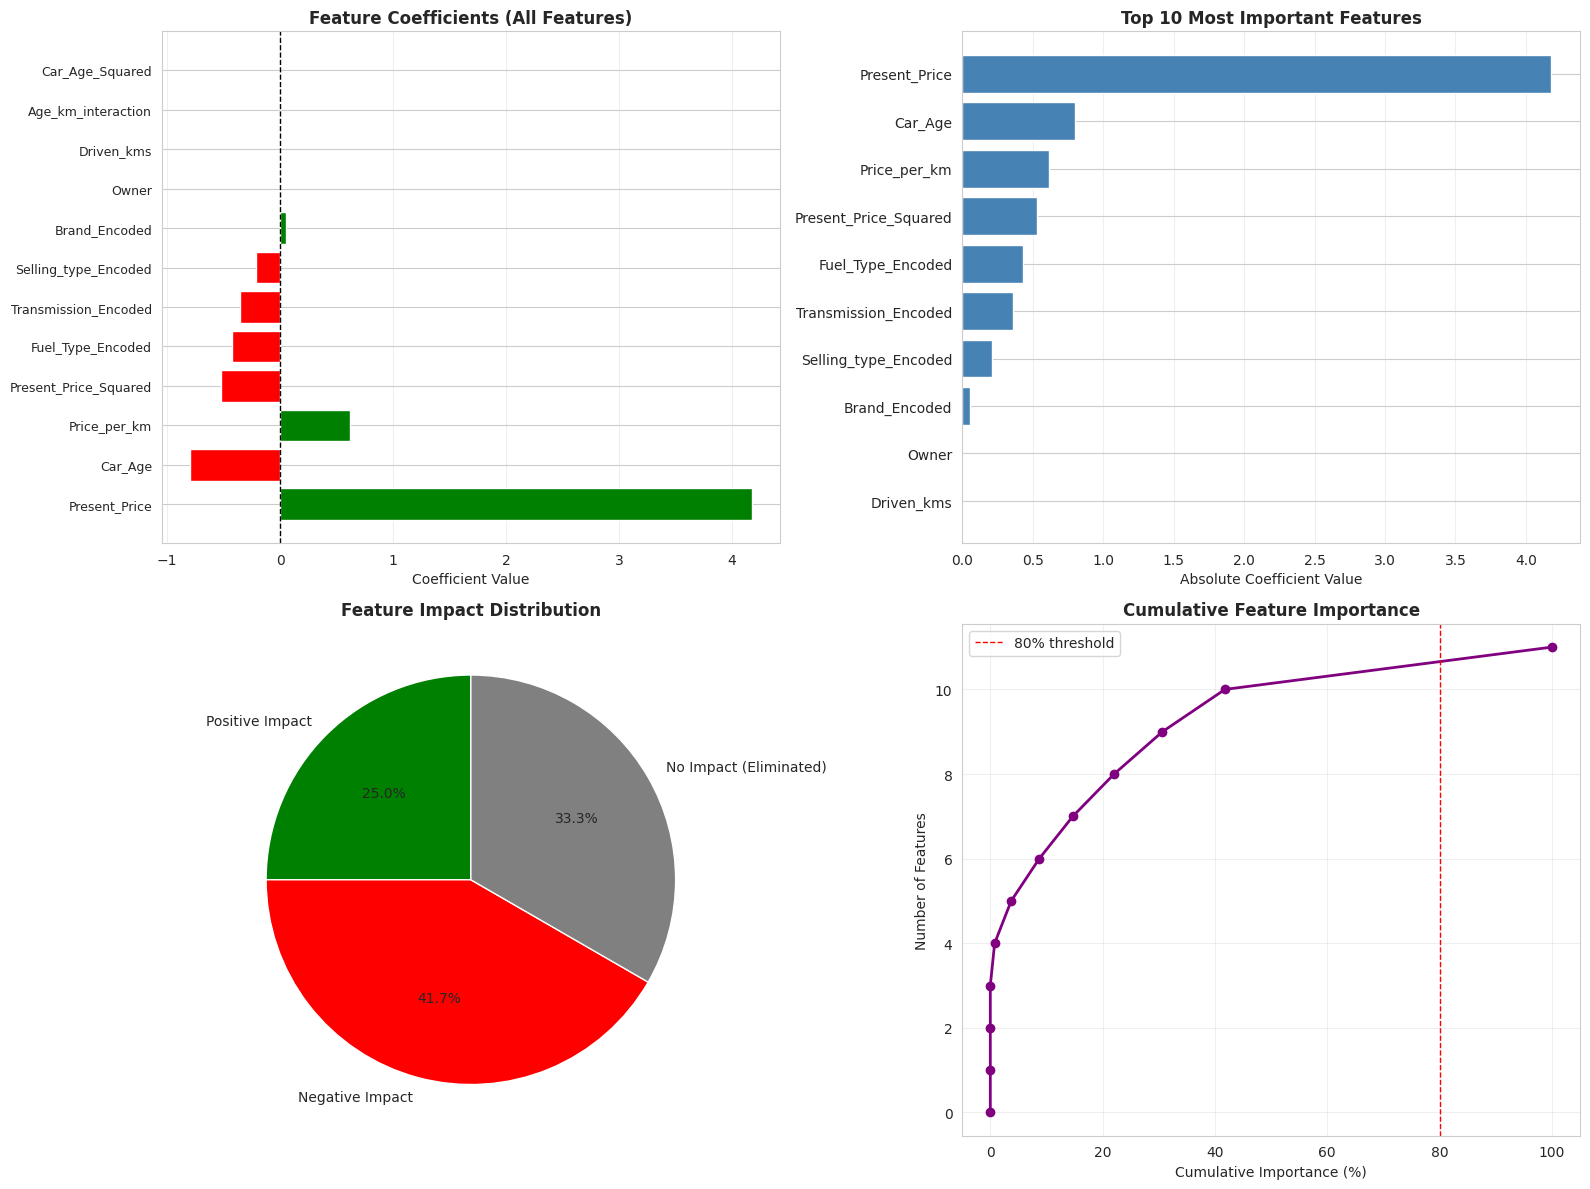


📊 11 features contribute to 80% of the model's predictive power


In [34]:
# Visualize how each feature affects price prediction
if best_model_name in ['Linear Regression', 'Ridge Regression', 'Lasso Regression']:

    fig, axes = plt.subplots(2, 2, figsize=(16, 12))

    # 1. Coefficient values with error bars
    feature_importance = pd.DataFrame({
        'Feature': feature_columns,
        'Coefficient': best_model.coef_,
        'Abs_Coefficient': np.abs(best_model.coef_)
    }).sort_values('Abs_Coefficient', ascending=False)

    # Top positive and negative features
    axes[0, 0].barh(range(len(feature_importance)),
                     feature_importance['Coefficient'],
                     color=['green' if x > 0 else 'red' for x in feature_importance['Coefficient']])
    axes[0, 0].set_yticks(range(len(feature_importance)))
    axes[0, 0].set_yticklabels(feature_importance['Feature'], fontsize=9)
    axes[0, 0].set_xlabel('Coefficient Value', fontsize=10)
    axes[0, 0].set_title('Feature Coefficients (All Features)', fontsize=12, fontweight='bold')
    axes[0, 0].axvline(x=0, color='black', linestyle='--', linewidth=1)
    axes[0, 0].grid(axis='x', alpha=0.3)

    # 2. Absolute coefficient comparison
    top_10 = feature_importance.head(10)
    axes[0, 1].barh(top_10['Feature'], top_10['Abs_Coefficient'], color='steelblue')
    axes[0, 1].set_xlabel('Absolute Coefficient Value', fontsize=10)
    axes[0, 1].set_title('Top 10 Most Important Features', fontsize=12, fontweight='bold')
    axes[0, 1].invert_yaxis()  # Changed from axes[0, 1].gca().invert_yaxis()
    axes[0, 1].grid(axis='x', alpha=0.3)

    # 3. Pie chart of positive vs negative vs zero features
    n_positive = len(feature_importance[feature_importance['Coefficient'] > 0])
    n_negative = len(feature_importance[feature_importance['Coefficient'] < 0])
    n_zero = len(feature_importance[feature_importance['Coefficient'] == 0])

    axes[1, 0].pie([n_positive, n_negative, n_zero],
                    labels=['Positive Impact', 'Negative Impact', 'No Impact (Eliminated)'],
                    colors=['green', 'red', 'gray'],
                    autopct='%1.1f%%',
                    startangle=90)
    axes[1, 0].set_title('Feature Impact Distribution', fontsize=12, fontweight='bold')

    # 4. Cumulative importance
    feature_importance_sorted = feature_importance.sort_values('Abs_Coefficient', ascending=True)
    cumulative_importance = np.cumsum(feature_importance_sorted['Abs_Coefficient'])
    cumulative_importance = cumulative_importance / cumulative_importance.max() * 100

    axes[1, 1].plot(cumulative_importance.values, range(len(cumulative_importance)),
                     marker='o', linewidth=2, color='purple')
    axes[1, 1].set_xlabel('Cumulative Importance (%)', fontsize=10)
    axes[1, 1].set_ylabel('Number of Features', fontsize=10)
    axes[1, 1].set_title('Cumulative Feature Importance', fontsize=12, fontweight='bold')
    axes[1, 1].grid(alpha=0.3)
    axes[1, 1].axvline(x=80, color='red', linestyle='--', linewidth=1, label='80% threshold')
    axes[1, 1].legend()

    plt.tight_layout()
    plt.show()

    # Find how many features contribute to 80% of importance
    threshold_80 = cumulative_importance[cumulative_importance <= 80].shape[0]
    print(f"\n📊 {threshold_80} features contribute to 80% of the model's predictive power")

# Understanding Lasso Regression Coefficients

In [38]:
# Educational interpretation
print("\n" + "="*70)
print("UNDERSTANDING LASSO REGRESSION COEFFICIENTS")
print("="*70)

print("""
Lasso Regression coefficients tell us:

1. **Magnitude**: How much the selling price changes for a 1-unit increase
   in the feature (after scaling)

2. **Sign**:
   - Positive (+): Feature increases the selling price
   - Negative (-): Feature decreases the selling price

3. **Zero Coefficients**: Lasso's special feature selection property
   - Features with coefficient = 0 are automatically eliminated
   - This makes Lasso great for identifying the most important features

4. **Real-world meaning**:
   Example: If 'Present_Price' has coefficient = 0.85
   - For every 1 lakh increase in present price (after scaling)
   - Selling price increases by approximately 0.85 lakhs (after scaling)

Note: Coefficients are based on scaled features, so direct interpretation
requires understanding the scaling transformation.
""")

print("="*70)


UNDERSTANDING LASSO REGRESSION COEFFICIENTS

Lasso Regression coefficients tell us:

1. **Magnitude**: How much the selling price changes for a 1-unit increase 
   in the feature (after scaling)

2. **Sign**: 
   - Positive (+): Feature increases the selling price
   - Negative (-): Feature decreases the selling price

3. **Zero Coefficients**: Lasso's special feature selection property
   - Features with coefficient = 0 are automatically eliminated
   - This makes Lasso great for identifying the most important features

4. **Real-world meaning**:
   Example: If 'Present_Price' has coefficient = 0.85
   - For every 1 lakh increase in present price (after scaling)
   - Selling price increases by approximately 0.85 lakhs (after scaling)

Note: Coefficients are based on scaled features, so direct interpretation
requires understanding the scaling transformation.

